In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in all the data into panda dataframes
aisles_df=pd.read_csv("aisles.csv")
departments_df=pd.read_csv("departments.csv")
order_prod_prior_df=pd.read_csv("order_products__prior.csv")
order_prod_train_df=pd.read_csv("order_products__train.csv")
orders_df=pd.read_csv("orders.csv")
products_df=pd.read_csv("products.csv")

In [207]:
# We will examine all the data one-by-one
aisles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
aisle_id    134 non-null int64
aisle       134 non-null object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [208]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


We notice that the aisles dataframe contains 134 rows, with each row containing an 
aisle_id (integer form) and the corresponding aisle name (string). There are no null entries

In [209]:
departments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
department_id    21 non-null int64
department       21 non-null object
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


In [210]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


The departments dataframe consists of 21 rows , each row containing a department id and the corresponding name. Again no null entries

In [211]:
order_prod_prior_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             32434489 non-null int64
product_id           32434489 non-null int64
add_to_cart_order    32434489 non-null int64
reordered            32434489 non-null int64
dtypes: int64(4)
memory usage: 989.8 MB


We notice that because we have more than 3 million rows, running .info() doesnt tell us the number of rows for each column

In [8]:
pd.options.display.max_info_rows=35000000 #setting the maximum number of rows which can be counted by .info()

In [9]:
order_prod_prior_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             32434489 non-null int64
product_id           32434489 non-null int64
add_to_cart_order    32434489 non-null int64
reordered            32434489 non-null int64
dtypes: int64(4)
memory usage: 989.8 MB


Now we observe that we have more than 32 million rows in this dataframe. All integers and no null entries

In [214]:
order_prod_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


order_prod_prior_df contains information about each order (order_id) : the product bought (identified by product_id), order in which it was added to cart (add_to_cart_order) and whether this item is a re-order (ordered in 'any previous order'). This large dataset will be used to model 

In [215]:
order_prod_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
order_id             1384617 non-null int64
product_id           1384617 non-null int64
add_to_cart_order    1384617 non-null int64
reordered            1384617 non-null int64
dtypes: int64(4)
memory usage: 42.3 MB


order_prod_train_df has same format as order_prod_prior_df but contains of training and test dataset entries

In [216]:
order_prod_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [217]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  3421083 non-null int64
user_id                   3421083 non-null int64
eval_set                  3421083 non-null object
order_number              3421083 non-null int64
order_dow                 3421083 non-null int64
order_hour_of_day         3421083 non-null int64
days_since_prior_order    3214874 non-null float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [218]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


We observe that the orders_df dataframe has 3421083 rows. All but one column "days_since_prior_order" has null entries. On doing a head to examine this dataframe we notice that these NaN correspond to the first order of a customer. 

In [219]:
orders_df['days_since_prior_order'].isna().sum() # Number of NaN values in days_since_prior_order column

206209

In [220]:
orders_df['order_number'][orders_df['order_number']==1].count()

206209

We have verified above that the number of orders with order_number =1 is same as the number of NaNs in the "days_since_prior_order" column

In [221]:
orders_df['eval_set'].unique()

array(['prior', 'train', 'test'], dtype=object)

We notice above that all the orders in orders_df are categorized as either belonging to the prior, train or test data

In [222]:
userid_evalset=orders_df.groupby('user_id')['eval_set'].value_counts().unstack().fillna(0).head()

In [223]:
userid_evalset['total_set']=orders_df.groupby('user_id').count()['order_number']

In [224]:
userid_evalset.head()

eval_set,prior,test,train,total_set
user_id,,,,
1,10.0,0.0,1.0,11
2,14.0,0.0,1.0,15
3,12.0,1.0,0.0,13
4,5.0,1.0,0.0,6
5,4.0,0.0,1.0,5


We notice that for each user id, one among the user's orders is a part of either the test or the train dataset

In [235]:
userid_evalset['total_prior_diff']=userid_evalset['total_set']-userid_evalset['prior']

In [236]:
userid_evalset['total_prior_diff'].nunique()

1

Above analysis shows that each user_id is associated with atleast one of a test or train data. The total is always higher than prior count by 1. 

In [237]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [238]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


There are 49688 products each associated with a product_id. There are no null values in this dataset. Each product is associated with an aisle_id and department_id. 

In [239]:
products_df['aisle_id'].nunique() # This gives us the same number as the number of rows in the aisle_df dataset

134

In [240]:
products_df['department_id'].nunique() # This gives us the same number as the number of rows in the department_df dataset

21

We can see that the dataset is clean. There are NaN values in the orders_df dataframe but these NaN values are meaningful. There are no missing values as apart from one column in the orders_df dataframe, all other columns in all dataframes seem to be populated. We can do some EDA to see if it can tell us more. 

We will now proceed to do some visual EDA of this dataset by plotting some graphs. 

In [241]:
 cnt_set= orders_df["eval_set"].value_counts()

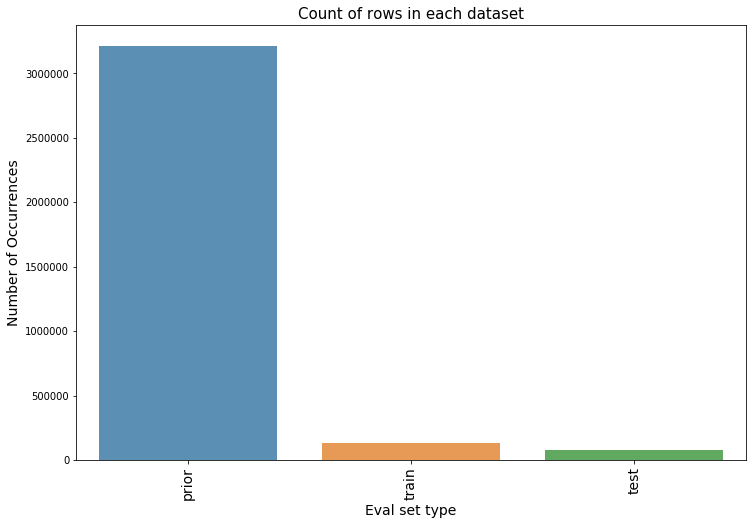

In [242]:
# Plotting the number of orders in each eval_set 
plt.figure(figsize=(12,8))
sns.barplot(cnt_set.index, cnt_set.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xlabel('Eval set type', fontsize=14)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical',fontsize=14)
plt.show()

In [243]:
orders_df.groupby("eval_set")["user_id"].nunique()

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

We can see from the above that the total number of customers is 206209. All customers have orders belonging in prior dataset. Part of the customers (their last orders) are in the training data and the rest of the customers (their kast orders) are in the test data. 

In [76]:
cnt_order=orders_df.groupby("user_id")["order_number"].max().value_counts().reset_index().rename(columns={"index":"max order number","order_number":"no of occurences"})

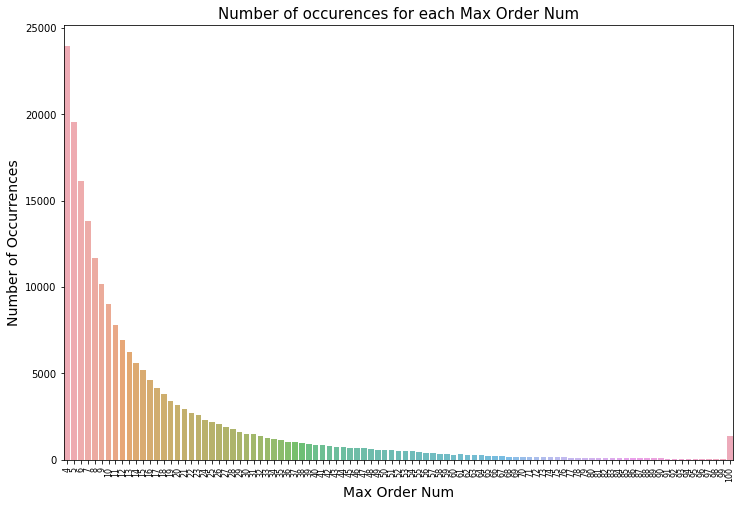

In [244]:
# Plotting the number of occurences of order vs. number of orders 
plt.figure(figsize=(12,8))
sns.barplot(cnt_order["max order number"], cnt_order["no of occurences"], alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xlabel('Max Order Num', fontsize=14)
plt.title('Number of occurences for each Max Order Num', fontsize=15)
plt.xticks(rotation='vertical',fontsize=8)
plt.show()

We can see that the number of occurences for a given max order number decreases in an exponential manner with increasing max order number. This seems reasonable because most customers may be using Instacart sparingly while fewer customers may be using Instacart on a regular basis. There is a spike at Max Order Num=100 because the max order num is capped at that number. 

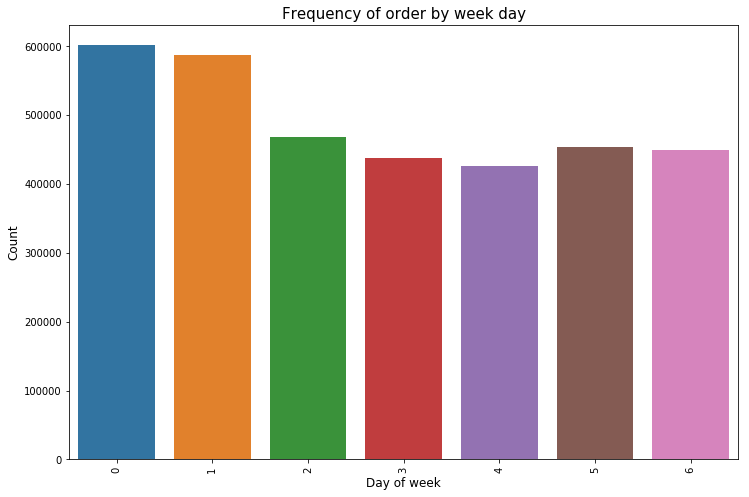

In [245]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

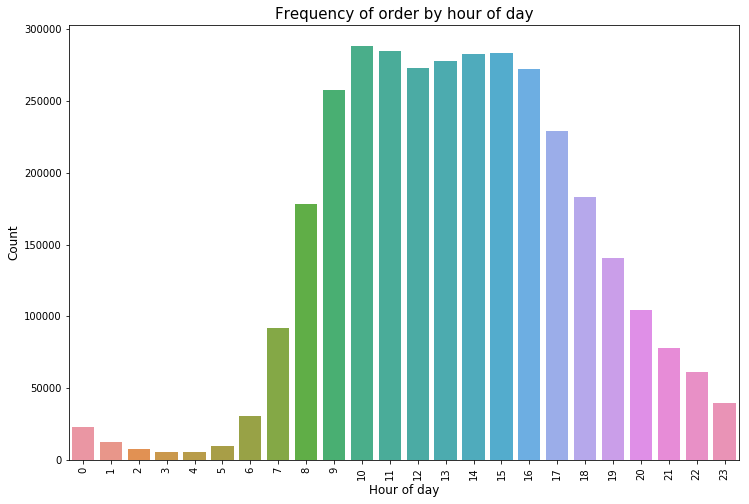

In [246]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

In [254]:
group_orders_df=orders_df.groupby(["order_dow","order_hour_of_day"])["order_number"].count().reset_index()

In [255]:
group_orders_df.head()

,order_dow,order_hour_of_day,order_number
0,0,0,3936
1,0,1,2398
2,0,2,1409
3,0,3,963
4,0,4,813


In [256]:
group_orders_df = group_orders_df.pivot(index='order_dow', columns='order_hour_of_day',values='order_number')

In [257]:
group_orders_df.head() # Format of the dataframe seems amenable for a heatmap

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645


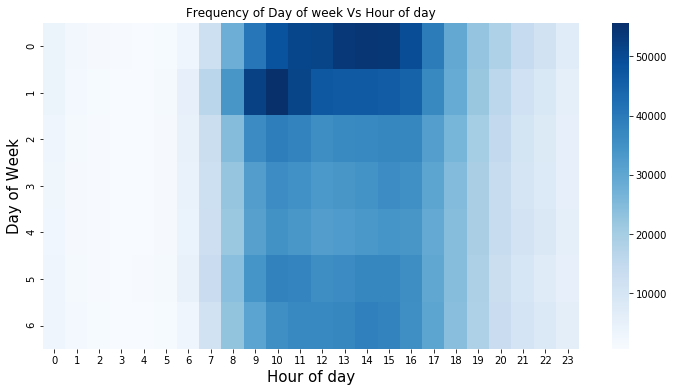

In [258]:
plt.figure(figsize=(12,6))
sns.heatmap(group_orders_df,cmap="Blues")
plt.xlabel("Hour of day",fontsize=15)
plt.ylabel("Day of Week",fontsize=15)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

From the above heatmap we can see that the maximum number of orders tend to come either late afternoon/early evening of Saturday or morning hours of Sunday. 

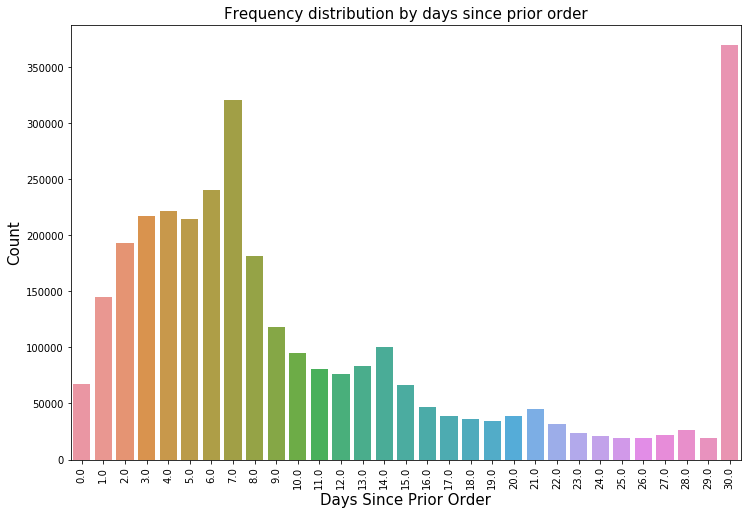

In [262]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order",data=orders_df)
plt.xlabel("Days Since Prior Order",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Frequency distribution by days since prior order",fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

It appears that many orders are placed once every week. There are also some interesting peaks at 14 days, 21 days and 28 days. There is one large peak at 30 but this is only because any days_since_prior_order > 30 are also classified under 30. 

In [263]:
group_orders_df=orders_df.groupby(["order_dow","days_since_prior_order"])["order_number"].count().reset_index()

In [264]:
group_orders_df.head()

,order_dow,days_since_prior_order,order_number
0,0,0.0,9175
1,0,1.0,18898
2,0,2.0,26784
3,0,3.0,30778
4,0,4.0,32674


In [265]:
group_orders_df=group_orders_df.pivot(index="order_dow",columns="days_since_prior_order",values="order_number")

In [266]:
group_orders_df.head()

days_since_prior_order,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
order_dow,,,,,,,,,,,,,,,,,,,,,
0,9175,18898,26784,30778,32674,32900,42244,75908,36219,18864,...,11908,6372,3693,3054,2932,3099,4078,6964,3833,69146
1,12278,19219,22963,35458,38801,38467,41600,65687,32144,17024,...,8735,6174,3425,3420,3261,3443,3629,4843,3585,62458
2,9676,26542,26354,23939,31712,30940,29124,32783,31119,18579,...,5206,5489,4016,2601,2796,2629,2849,3205,3241,50964
3,9457,22655,36688,31134,24337,28993,27099,28792,21444,19990,...,4358,3963,4108,3238,2199,2376,2514,2709,2383,46695
4,9664,21385,30496,38728,31042,23152,28018,29707,19696,16070,...,4043,3373,3324,3333,2800,1927,2226,2342,2027,44341


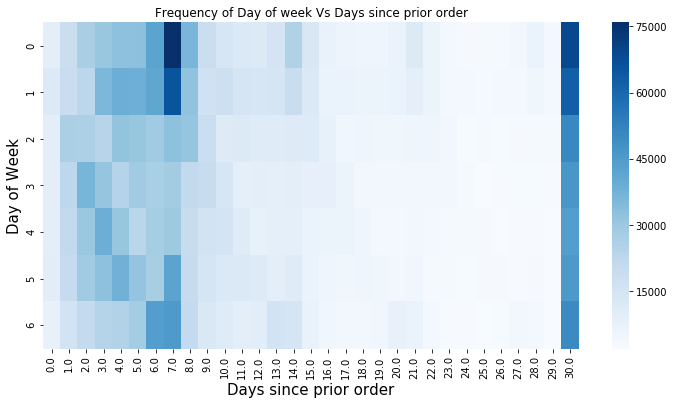

In [267]:
plt.figure(figsize=(12,6))
sns.heatmap(group_orders_df,cmap="Blues")
plt.xlabel("Days since prior order",fontsize=15)
plt.ylabel("Day of Week",fontsize=15)
plt.title("Frequency of Day of week Vs Days since prior order")
plt.show()

Above figure shows that many customers who buy on Saturday and Sunday also buy on a weekly basis (7 days). So for quite of few customers ordering weekly on either saturday night or sunday morning in preparation for upcoming weeks is routine. Perhaps these customers will also be more predictable? Now let us see if there is any specific day where customers prefer to make their first buy. 

In [268]:
orders_df[orders_df["order_number"]==1]["order_dow"].value_counts().reset_index().rename(columns={"index":"Day of Week","order_dow":"1st time orders"})

,Day of Week,1st time orders
0,0,38517
1,1,34973
2,6,28691
3,2,27861
4,5,26073
5,3,25658
6,4,24436


Once again we notice that Saturday and Sunday are when more people are likely to order for the first time. Least is on Wednesday

In [269]:
order_prod_prior_df["reordered"].sum() / order_prod_prior_df.shape[0] # fraction of items in the prior dataset which are reorders

0.5896974667922161

In [145]:
order_prod_train_df["reordered"].sum() / order_prod_train_df.shape[0] # fraction of items in the train dataset which are reorders

0.5985944127509629

In [164]:
grouped_df = order_prod_prior_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()

In [165]:
grouped_df.head()

,order_id,reordered
0,2,6
1,3,8
2,4,12
3,5,21
4,6,0


In [174]:
np.count_nonzero(np.array(grouped_df["reordered"]))/grouped_df["order_id"].count()

0.8791514068669565

Nearly 88% of orders contain atleast one re-ordered item. About 12% of orders contain NO re-ordered items.

In [270]:
grouped_df = order_prod_train_df.groupby("order_id")["reordered"].sum().reset_index()

In [271]:
grouped_df.head()

,order_id,reordered
0,1,4
1,36,6
2,38,1
3,96,5
4,98,45


In [272]:
np.count_nonzero(np.array(grouped_df["reordered"]))/grouped_df["order_id"].count()

0.9344404728334185

In the training dataset, a higher percentage of orders contain reordered items compared to the prior dataset. 

In [181]:
grouped_df = order_prod_prior_df.groupby("order_id")["add_to_cart_order"].max().reset_index()

In [185]:
cnt_set=grouped_df["add_to_cart_order"].value_counts()

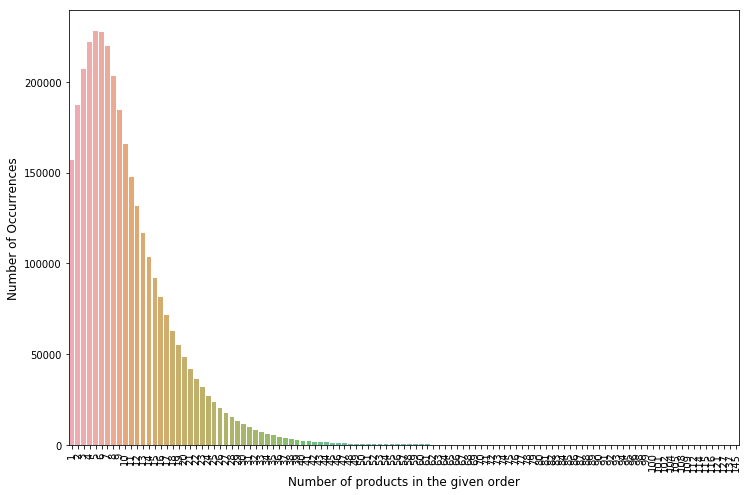

In [186]:
plt.figure(figsize=(12,8))
sns.barplot(cnt_set.index, cnt_set.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [187]:
order_prod_prior_df["add_to_cart_order"].max()

145

We can see that the maximum number of items in one order was 145. But most order sizes are skewed very much to the left. Carts with 5 or 6 items are the most frequently occuring. 

In [274]:
prod_aisle_dep_df=(products_df.merge(departments_df,on="department_id")).merge(aisles_df,on="aisle_id")

In [275]:
prod_aisle_dep_df.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,snacks,cookies cakes
2,102,Danish Butter Cookies,61,19,snacks,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,snacks,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,snacks,cookies cakes


In [276]:
order_prod_prior_df=order_prod_prior_df.merge(prod_aisle_dep_df,on="product_id")

In [277]:
order_prod_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,dairy eggs,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,dairy eggs,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,dairy eggs,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,dairy eggs,eggs


In [278]:
cnt_set=order_prod_prior_df["product_name"].value_counts().reset_index().rename(columns={"index":"product_name","product_name":"count"})

In [279]:
cnt_set.head(15)

,product_name,count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


We can see that the top two products are Bananas. Most items are fruits and vegetables. At number 10 is organic milk. Majority of these items are organic which can tell us something about the demographics of people who use instacart or maybe participating grocery stores. 

In [280]:
cnt_set["count"].sum() # total number of rows in order_prior dataset 

32434489

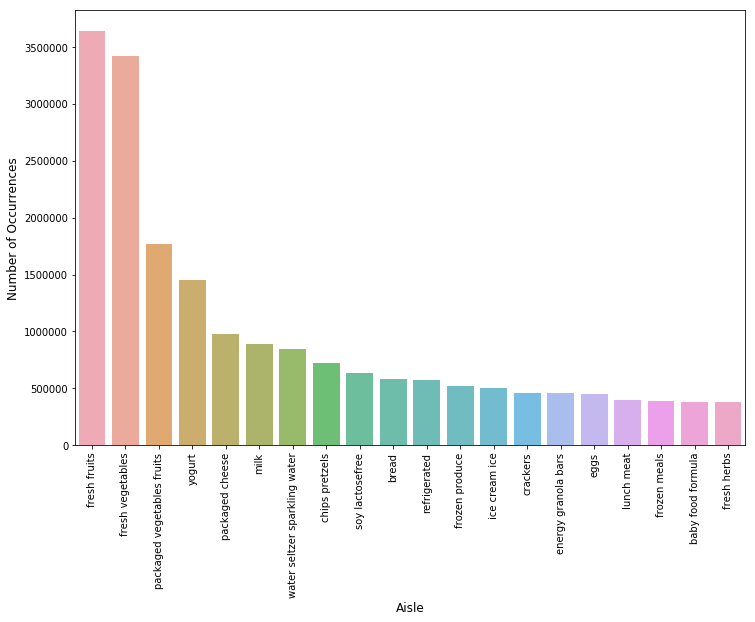

In [282]:
cnt_set = order_prod_prior_df['aisle'].value_counts().head(20) # Finding the top 20 aisles in terms of number of items ordered 
plt.figure(figsize=(12,8))
sns.barplot(cnt_set.index, cnt_set.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

Yogurt at number 4 ? Perhaps we can examine what items are there in the yogurt aisle

In [283]:
prod_aisle_dep_df[prod_aisle_dep_df["aisle"]=="yogurt"]

,product_id,product_name,aisle_id,department_id,department,aisle
26570,9,Light Strawberry Blueberry Yogurt,120,16,dairy eggs,yogurt
26571,132,Yogurt Strawberry Pomegranate,120,16,dairy eggs,yogurt
26572,264,Non-Fat Blueberry on the Bottom Greek Yogurt,120,16,dairy eggs,yogurt
26573,339,Creamline Yogurt Wild Blueberry,120,16,dairy eggs,yogurt
26574,400,Grass-Fed Yogurt Blueberry Cardamom,120,16,dairy eggs,yogurt
26575,419,Light & Fit Strawberry Cheesecake Greek Nonfat...,120,16,dairy eggs,yogurt
26576,446,Blueberry Pomegranate Acaí Cultured Goat Milk ...,120,16,dairy eggs,yogurt
26577,459,Honey Vanilla Greek Yogurt,120,16,dairy eggs,yogurt
26578,484,Plain Greek Goat Yogurt,120,16,dairy eggs,yogurt
26579,486,Lowfat Raspberry Kefir Probiotic Cultured Milk...,120,16,dairy eggs,yogurt


There are more than 1000 kinds of yogurts in the yogurt aisle! 

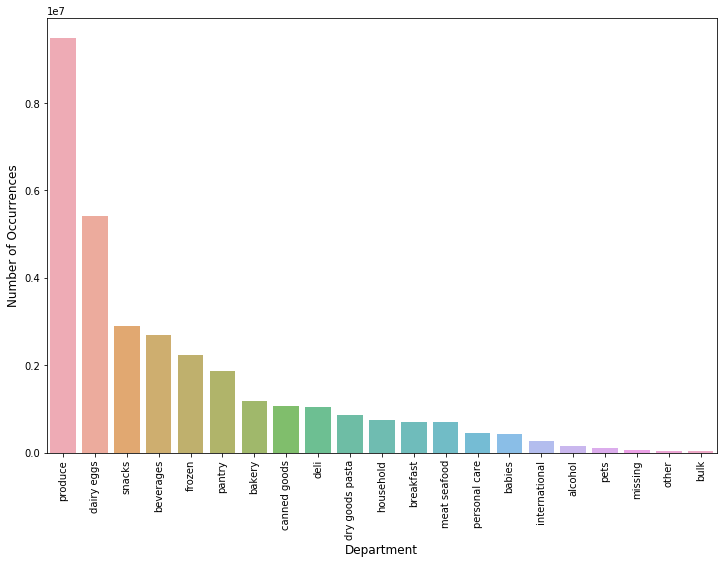

In [291]:
cnt_set = order_prod_prior_df['department'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(cnt_set.index, cnt_set.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [288]:
prod_aisle_dep_df[prod_aisle_dep_df["department"]=="missing"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 42813 to 44070
Data columns (total 6 columns):
product_id       1258 non-null int64
product_name     1258 non-null object
aisle_id         1258 non-null int64
department_id    1258 non-null int64
department       1258 non-null object
aisle            1258 non-null object
dtypes: int64(3), object(3)
memory usage: 68.8+ KB


We notice that 1258 items have missing department and aisle names. Their corresponding ids are however present

In [289]:
prod_aisle_dep_df[prod_aisle_dep_df["department"]=="missing"].head()

,product_id,product_name,aisle_id,department_id,department,aisle
42813,38,Ultra Antibacterial Dish Liquid,100,21,missing,missing
42814,72,Organic Honeycrisp Apples,100,21,missing,missing
42815,110,Uncured Turkey Bologna,100,21,missing,missing
42816,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,21,missing,missing
42817,417,Classics Baby Binks Easter Chocolate Bunny,100,21,missing,missing


Looks like some miscellaneous items have not been classified under any department or aisle. Let us try to visualize the above distribution of items ordered among various departments by using a pie-chart. 

In [303]:
pie_labels=cnt_set.index

In [304]:
pie_sizes=(cnt_set.values/(cnt_set.values.sum()))*100

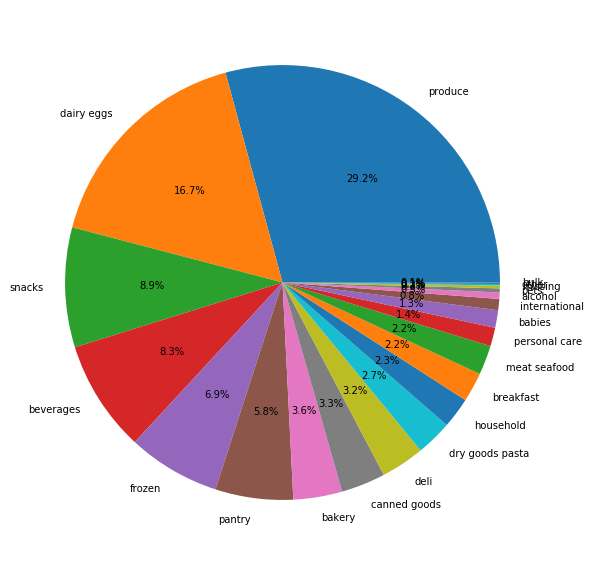

In [307]:
plt.figure(figsize=(10,10))
plt.pie(pie_sizes, labels=pie_labels, autopct='%1.1f%%')
plt.show()

Which items are re-ordered the most? Should be similar to which items are ordered 

In [313]:
order_prod_prior_df[order_prod_prior_df["reordered"]==1]["product_name"].value_counts().reset_index().head(10)

,index,product_name
0,Banana,398609
1,Bag of Organic Bananas,315913
2,Organic Strawberries,205845
3,Organic Baby Spinach,186884
4,Organic Hass Avocado,170131
5,Organic Avocado,134044
6,Organic Whole Milk,114510
7,Large Lemon,106255
8,Organic Raspberries,105409
9,Strawberries,99802


Its interesting to note that among items(whether reordered or not) , organic whole milk is at 10th position while among reordered items it is number 7. 

In [322]:
temp_df=order_prod_prior_df.groupby("add_to_cart_order")["reordered"].mean().reset_index().rename(columns={"reordered":"reorder_ratio"})[:70]

,add_to_cart_order,reorder_ratio
0,1,0.677533
1,2,0.676251
2,3,0.658037
3,4,0.636958
4,5,0.617383


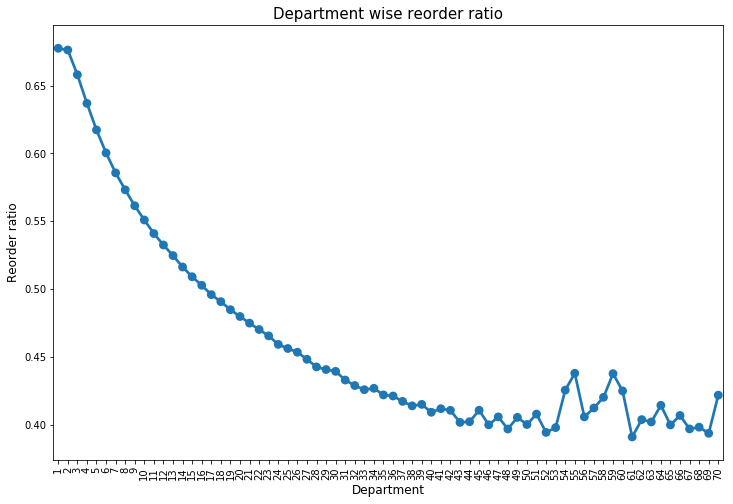

In [327]:
plt.figure(figsize=(12,8))
sns.pointplot(temp_df["add_to_cart_order"],temp_df["reorder_ratio"],alpha=0.8)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

add_to_cart_order  product_name          
1                  Banana                    110916
                   Bag of Organic Bananas     78988
                   Organic Whole Milk         30927
                   Organic Strawberries       27975
                   Organic Hass Avocado       24116
Name: product_name, dtype: int64